In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
##Crear fechas desde 01-01-2022 hasta 04-05-2023
fechas = pd.date_range(start='01-01-2022',end='04-05-2023')
#fechas = fechas.strftime('%d-%m-%Y')
fechas

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10',
               ...
               '2023-03-27', '2023-03-28', '2023-03-29', '2023-03-30',
               '2023-03-31', '2023-04-01', '2023-04-02', '2023-04-03',
               '2023-04-04', '2023-04-05'],
              dtype='datetime64[ns]', length=460, freq='D')

In [4]:
dia_semana = fechas.day_name()
dia_semana

Index(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday', 'Saturday', 'Sunday', 'Monday',
       ...
       'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
      dtype='object', length=460)

In [5]:
ventas = pd.DataFrame({'fechas':fechas,'nombre_dia':dia_semana})
ventas

,fechas,nombre_dia
0,2022-01-01,Saturday
1,2022-01-02,Sunday
2,2022-01-03,Monday
3,2022-01-04,Tuesday
4,2022-01-05,Wednesday
...,...,...
455,2023-04-01,Saturday
456,2023-04-02,Sunday
457,2023-04-03,Monday
458,2023-04-04,Tuesday


In [6]:
#reglas
#lunes: 5 cervezas
#martes: 20 cervezas
#miercoles: 40 cervezas
#jueves: 150 cervezas
#viernes: 200 cervezas
#sabado: 200 cervezas
#domingo: 0 cervezas

media_dias = {'Monday': 5, 'Tuesday': 20, 'Wednesday': 40, 'Thursday': 150, 'Friday': 200, 'Saturday': 200, 'Sunday': 0}

def simular_ventas(dia):
    '''esta función simula una venta de cerveza
     entradas: dia (dia de la semana) 
     salida: valor con posible venta para ese día'''
    

    resultado_venta = np.random.normal(media_dias[dia],0.3*media_dias[dia])
    resultado_venta = int(np.round(resultado_venta))
    resultado_venta = max(resultado_venta,0)
    return resultado_venta

simular_ventas('Monday')

8

In [7]:
ventas['ventas'] = ventas['nombre_dia'].apply(simular_ventas)

In [8]:
ventas

,fechas,nombre_dia,ventas
0,2022-01-01,Saturday,221
1,2022-01-02,Sunday,0
2,2022-01-03,Monday,5
3,2022-01-04,Tuesday,18
4,2022-01-05,Wednesday,55
...,...,...,...
455,2023-04-01,Saturday,185
456,2023-04-02,Sunday,0
457,2023-04-03,Monday,5
458,2023-04-04,Tuesday,12


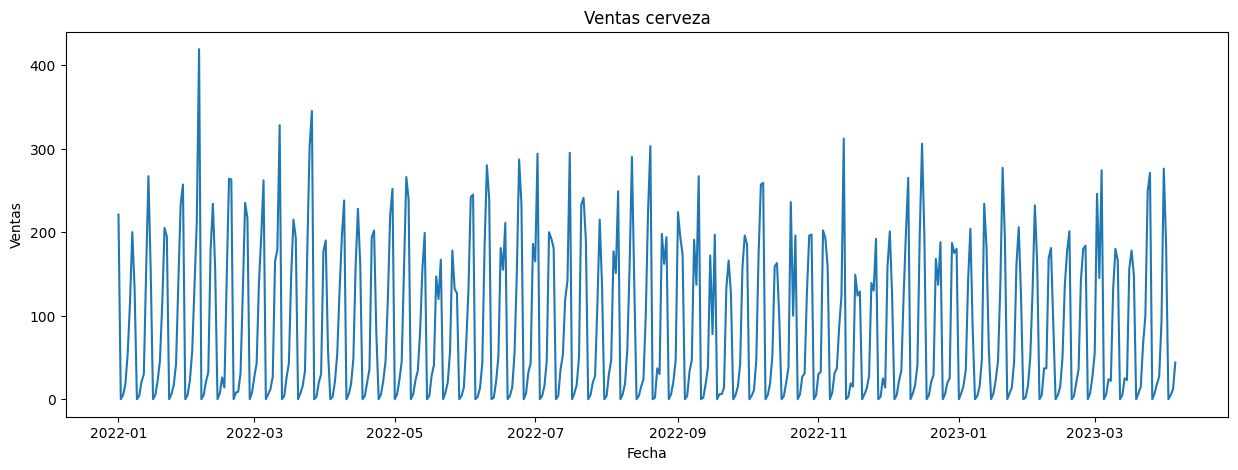

In [9]:
#Graficar los fatos
plt.figure(figsize=(15,5))
plt.plot(ventas['fechas'],ventas['ventas'])
plt.title('Ventas cerveza')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.show()

In [10]:
#Promedio de ventas semanales
ventas_semanales = ventas.groupby(pd.Grouper(key='fechas',freq='W')).agg({'ventas':'sum'})
ventas_semanales.drop(ventas_semanales.tail(1).index,inplace=True)
ventas_semanales.drop(ventas_semanales.head(1).index,inplace=True)
ventas_semanales

,ventas
fechas,
2022-01-09,526
2022-01-16,628
2022-01-23,587
2022-01-30,695
2022-02-06,848
...,...
2023-03-05,754
2023-03-12,530
2023-03-19,536


In [11]:
ventas_semanales.describe()

,ventas
count,65.000000
mean,620.323077
std,94.896013
min,439.000000
25%,536.000000
50%,622.000000
75%,679.000000
max,882.000000


In [12]:
# Programemos compra de cervezas
#Suponemos que todos los lunes compramos a primera hora 720 cervezas
# Vamos a describir como se gasta la cerveza en el inventario

In [16]:
ventas['compra']=0
ventas.loc[ventas['nombre_dia']=='Monday','compra']=720

ventas = ventas.iloc[2:,:]
ventas

Inventario=[]
for i in ventas.index:
    if i == ventas.index[0]:
        Inventario.append(720-ventas.loc[i,'ventas'])
    else:
        Inventario.append(Inventario[-1]-ventas.loc[i,'ventas']+ventas.loc[i,'compra'])
ventas['Inventario'] = Inventario
ventas

/var/folders/9v/524w7g1x3714kzl41mg87n300000gn/T/ipykernel_53337/3043498838.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ventas['compra']=0
/var/folders/9v/524w7g1x3714kzl41mg87n300000gn/T/ipykernel_53337/3043498838.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ventas['Inventario'] = Inventario


,fechas,nombre_dia,ventas,compra,Inventario
4,2022-01-05,Wednesday,55,0,665
5,2022-01-06,Thursday,116,0,549
6,2022-01-07,Friday,200,0,349
7,2022-01-08,Saturday,132,0,217
8,2022-01-09,Sunday,0,0,217
...,...,...,...,...,...
455,2023-04-01,Saturday,185,0,6502
456,2023-04-02,Sunday,0,0,6502
457,2023-04-03,Monday,5,720,7217
458,2023-04-04,Tuesday,12,0,7205


In [7]:

fechas = pd.date_range(start='01-01-2022', end='04-05-2023')
dia_semana = fechas.day_name()
media_dias = {'Monday': 5, 'Tuesday': 20, 'Wednesday': 40, 'Thursday': 150, 'Friday': 200, 'Saturday': 200, 'Sunday': 0}

def crear_data_frames():

    for k in range(1000):
        ventas = pd.DataFrame({'fecha': fechas, 'nombre_dia': dia_semana})
        ventas['ventas'] = ventas['nombre_dia'].apply(simular_ventas)
        ventas['compra'] = 0
        ventas.loc[ventas['nombre_dia'] == 'Monday', 'compra'] = 720

        Inventario = []
        for i in ventas.index:
            if i == ventas.index[0]:
                Inventario.append(720 - ventas.loc[i, 'ventas'])
            else:
                Inventario.append(Inventario[-1] - ventas.loc[i, 'ventas'] + ventas.loc[i, 'compra'])
        ventas['Inventario'] = Inventario

        file_name = f"../../Sample_Data/Raw/ventas_"+str(k)+".csv"
        ventas.to_csv(file_name, index=False)

def simular_ventas(dia):
    resultado_venta = np.random.normal(media_dias[dia], 0.3 * media_dias[dia])
    resultado_venta = int(np.round(resultado_venta))
    resultado_venta = max(resultado_venta, 0)
    return resultado_venta

crear_data_frames()

In [8]:
lista_df_ventas = []

for k in range(1000):
    ventas_temporales = pd.read_csv(f"../../Sample_Data/Raw/ventas_"+str(k)+".csv")
    ventas_temporales["fuente"] = k
    lista_df_ventas.append(ventas_temporales)

ventas_totales = pd.concat(lista_df_ventas)

In [11]:
ventas_totales

,fecha,nombre_dia,ventas,compra,Inventario,fuente
0,2022-01-01,Saturday,172,0,548,0
1,2022-01-02,Sunday,0,0,548,0
2,2022-01-03,Monday,8,720,1260,0
3,2022-01-04,Tuesday,21,0,1239,0
4,2022-01-05,Wednesday,54,0,1185,0
...,...,...,...,...,...,...
455,2023-04-01,Saturday,194,0,6065,999
456,2023-04-02,Sunday,0,0,6065,999
457,2023-04-03,Monday,6,720,6779,999
458,2023-04-04,Tuesday,22,0,6757,999
